<a href="https://colab.research.google.com/github/rithikb24/python/blob/master/rabbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from fastai.vision import *

In [30]:
proj_path = 'gdrive/My Drive/pytorchdata/'

In [31]:
p_path = Path(proj_path)

In [32]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes

['penguins ', 'rabbits']

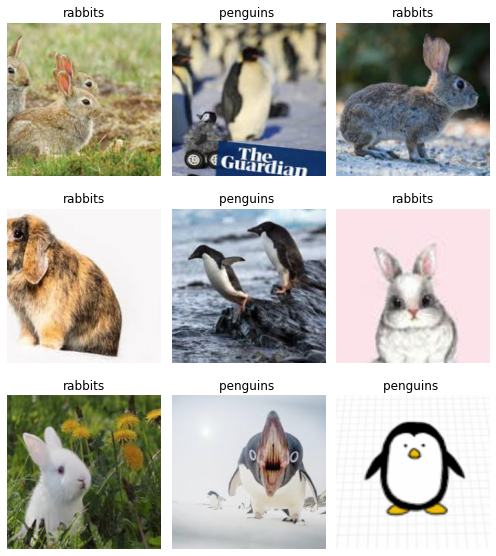

In [34]:
data.show_batch(rows=3,figsize=(7,8))

In [35]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['penguins ', 'rabbits'], 2, 335, 83)

In [36]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.097453,0.526870,0.180723,00:06
1,0.616729,0.143232,0.024096,00:06
2,0.404476,0.107379,0.024096,00:06
3,0.307156,0.052243,0.012048,00:06
4,0.234322,0.026043,0.012048,00:06
5,0.188748,0.017431,0.012048,00:06
6,0.154107,0.015384,0.012048,00:06
7,0.128472,0.012655,0.000000,00:06


In [38]:
learn.save('model1_69', return_path=True)

PosixPath('gdrive/My Drive/pytorchdata/models/model1_69.pth')

In [39]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


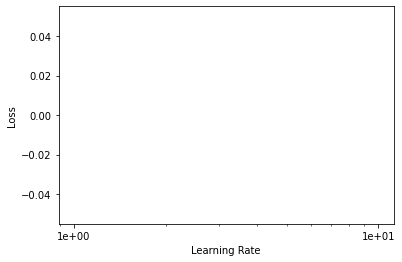

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:


learn.load('model1_69')
interp = ClassificationInterpretation.from_learner(learn)



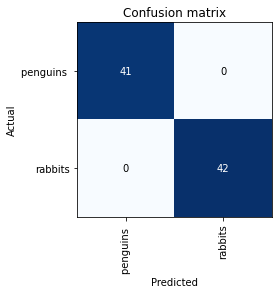

In [42]:
interp.plot_confusion_matrix()

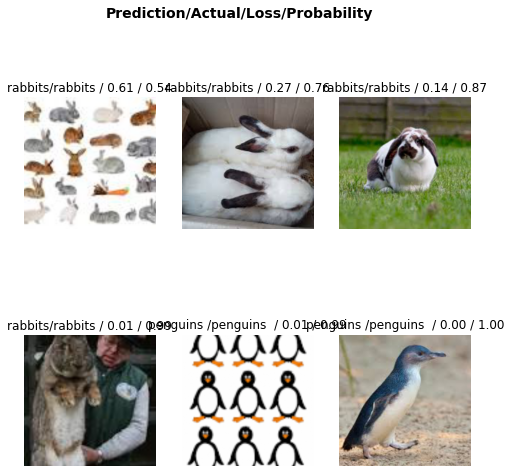

In [44]:
interp.plot_top_losses(6, figsize=(8,8))